In [56]:
import torch
from torch import tensor
import numpy as np
import torch.nn as nn
relu = nn.functional.relu
softmax = nn.functional.softmax
from torch.nn.functional import cross_entropy
from pathlib import Path
import os, shutil
from os import listdir
import pickle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import pickle
import pandas as pd
from pandas import Series, DataFrame

In [19]:
class Model(nn.Module):

    # initializer function
    def __init__(self, input_shape=(3, 199,336), classes=9):
        super(Model, self).__init__()
        # five convolutional layers
        self.conv1 = nn.Conv2d(in_channels=input_shape[0], out_channels=8, kernel_size=3, stride=1)       
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 1)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1)
        self.conv4 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1)
        self.conv5 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1)
        # one dropout layer
        self.dropout = nn.Dropout(0.3)
        # one dense layer
        self.final_dense = nn.Linear(128, 150) 

        self.batchnorm1 = nn.BatchNorm2d(8)
        self.batchnorm2 = nn.BatchNorm2d(16)
        self.batchnorm3 = nn.BatchNorm2d(32)
        self.batchnorm4 = nn.BatchNorm2d(64)
        self.batchnorm5= nn.BatchNorm2d(128)

        for m in (self.conv1, self.conv2, self.conv3, self.conv4, self.conv5, self.final_dense):   #converts from default weight normalization to glorot(xavier)
            nn.init.constant_(m.bias,0)
            nn.init.xavier_normal_(m.weight, np.sqrt(2))

    # forward-pass function
    def forward(self, x):
        x = relu(self.conv1(x))     #after each convolution, pool and normalize
        x = self.pool(x)            #used to reduce dimensionality
        x = self.batchnorm1(x)
        #x = self.dropout(x)
        
        x = relu(self.conv2(x))
        x = self.pool(x)
        x = self.batchnorm2(x)
        #x = self.dropout(x)
        
        x = relu(self.conv3(x))
        x = self.pool(x)
        x = self.batchnorm3(x)
        
        x = relu(self.conv4(x))
        x = self.pool(x)
        x = self.batchnorm4(x)
        
        x = relu(self.conv5(x))
        x = self.pool(x)
        x = self.batchnorm5(x)
        
        x = x.reshape(len(x),-1)
        x = self.dropout(x)
        x = softmax(self.final_dense(x), dim = 1)
        
        return x

In [20]:
def accuracy(predictions, truthdata):
    #Returns the mean classification accuracy for a batch of predictions.
    ''''
    Parameters
    ----------
    predictions : Union[numpy.ndarray, mg.Tensor], shape=(M, D)
        The scores for D classes, for a batch of M data points
    truth : numpy.ndarray, shape=(M,)
        The true labels for each datum in the batch: each label is an
        integer in [0, D)
    
    Returns
    -------
    float
    '''''
    return np.mean(np.argmax(predictions, axis=1) == truthdata) 

In [41]:
images_dir_true = Path(r"C:\Users\g_bab\Downloads\dataCLASSES_wo_rocket_body").expanduser()
labels_imgs = []
count = 0
for z in range(len(listdir(images_dir_true))):
    im = np.load(os.path.join(images_dir_true, "real_set"+str(z+1)+".npy"))
    labels_imgs.append(im)
# stand in below
# labels_imgs = range(126)

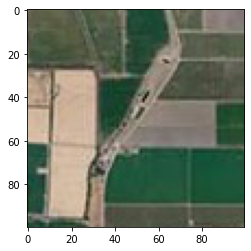

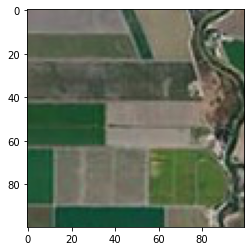

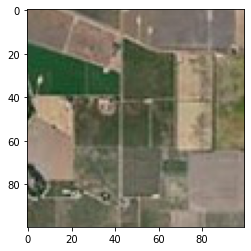

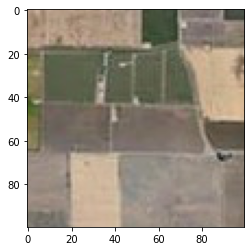

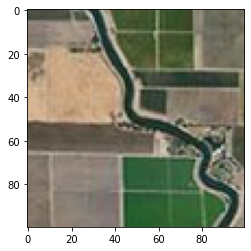

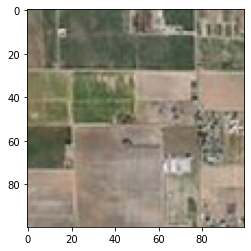

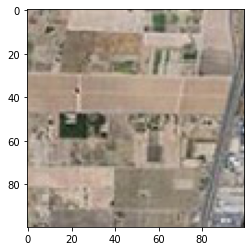

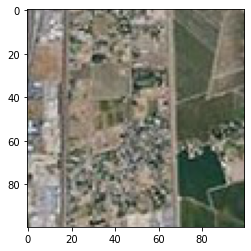

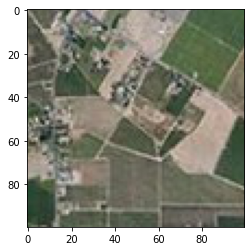

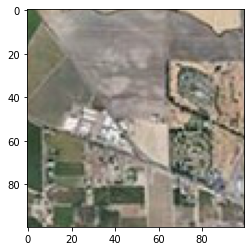

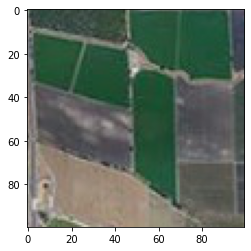

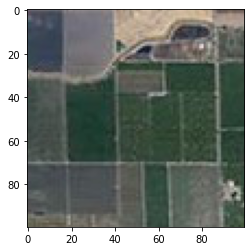

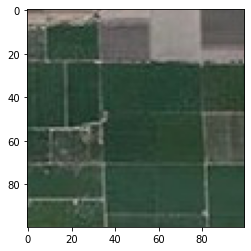

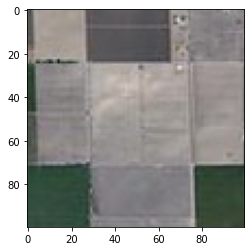

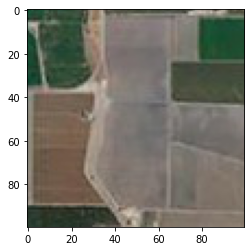

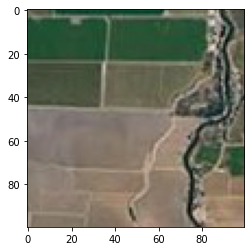

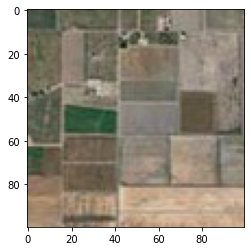

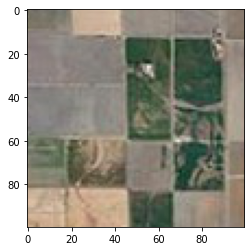

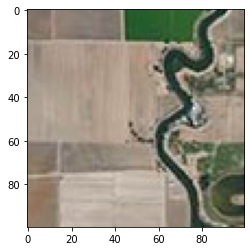

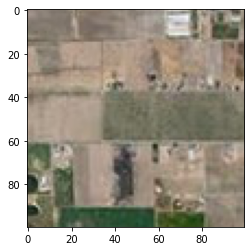

In [42]:
for i in range(20):
    fig, ax = plt.subplots()
    ax.imshow(labels_imgs[i]) 

In [43]:
#need to go generate/load this stuff in from data gen -- also make sure to increase number of iterations on that to get more data
# with open(os.path.join(r"C:\Users\g_bab\Downloads",'myDictionaryrocket.pkl'), "rb") as f:
#     one_hots_dict = pickle.load(f)

In [57]:
img_data = [i for i in range(len(labels_imgs))]     
print(len(img_data))
onehotslist = []
for label in img_data:
    blank = np.zeros(len(img_data))
    blank[label] = 1
    onehotslist.append(blank)
#print(onehotslist)
onehots_dict = {img_data[i]:onehotslist[i] for i in range(len(img_data))}
#print(onehots_dict)

126


<ipython-input-45-9caba9401d44>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


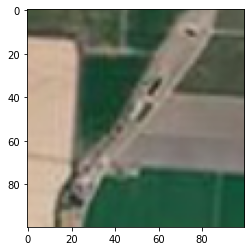

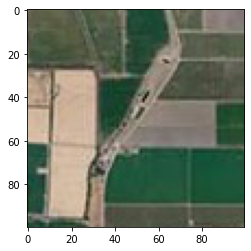

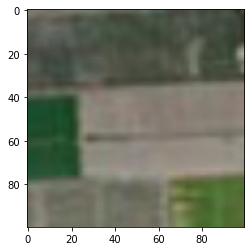

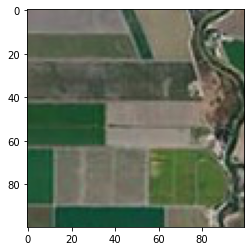

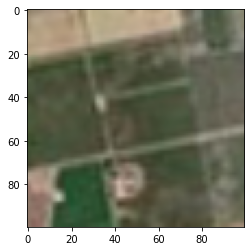

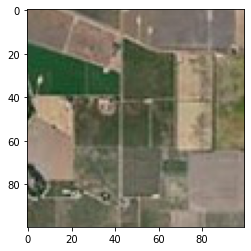

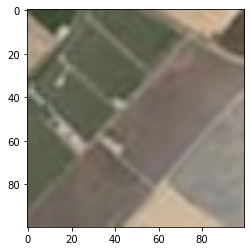

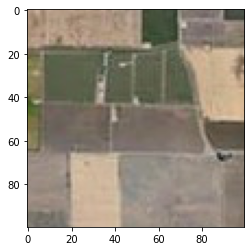

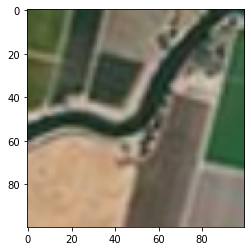

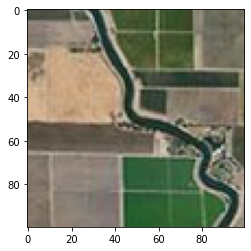

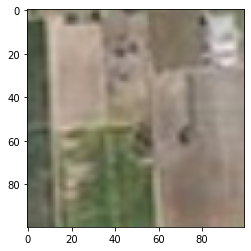

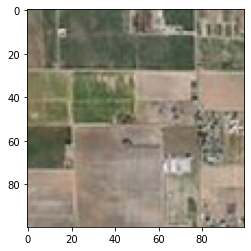

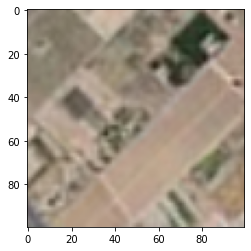

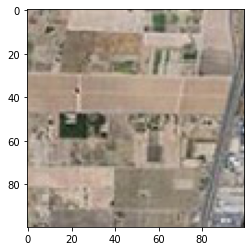

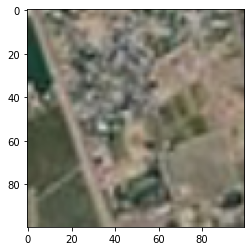

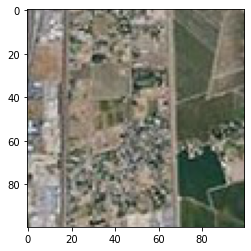

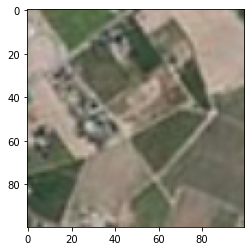

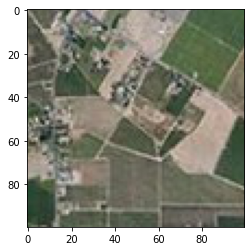

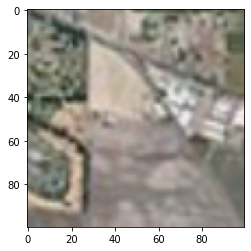

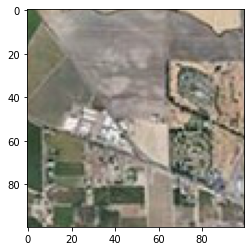

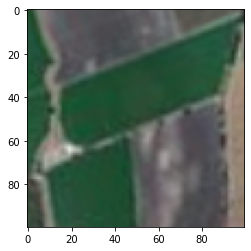

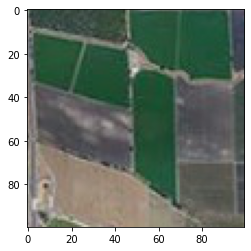

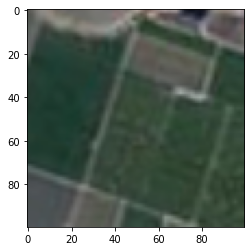

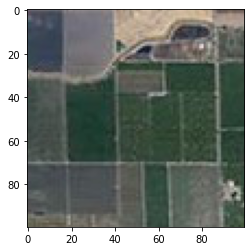

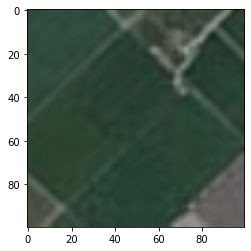

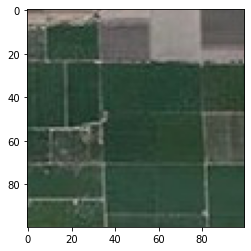

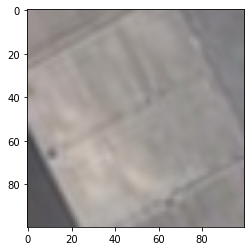

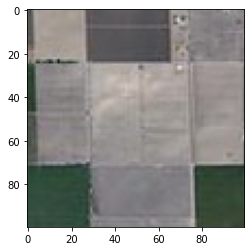

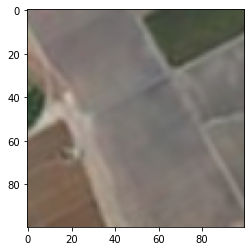

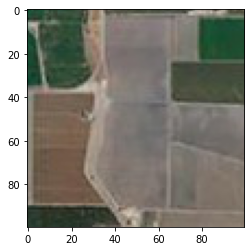

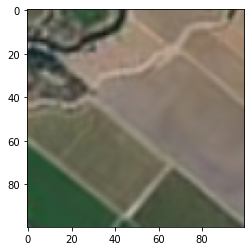

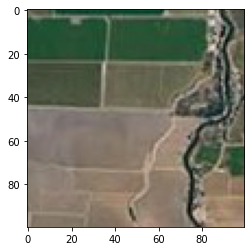

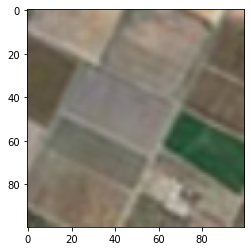

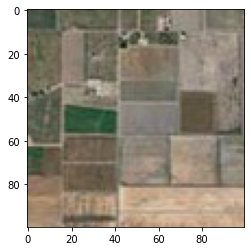

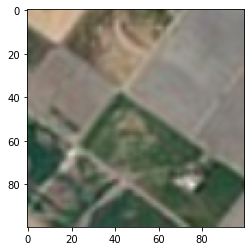

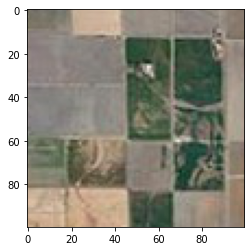

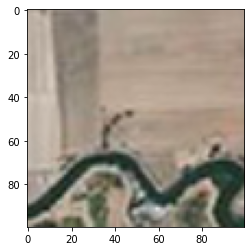

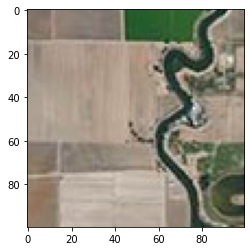

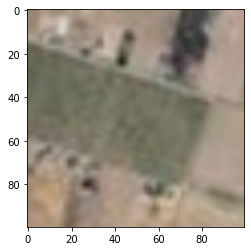

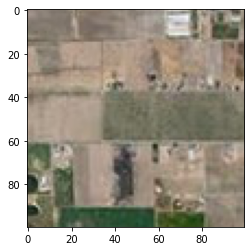

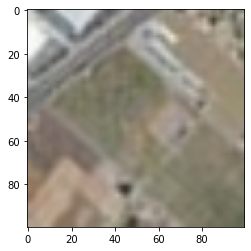

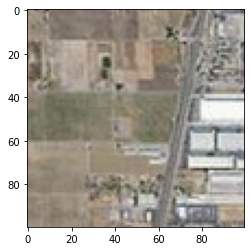

In [45]:
#fig, ax = plt.subplots()

images_dir = Path(r"C:\Users\g_bab\Downloads\data_wo_rocket_body").expanduser()
labelslist = []
x_data=[]
xtest_data = []
labelslisttest = []
count = 0
for k in range(len(listdir(images_dir))):
    im = np.load(os.path.join(images_dir, "train_set"+str(k+1)+".npy"))
    #print(im.shape) 
    fig, ax = plt.subplots()
    ax.imshow(im) 
    fig, ax = plt.subplots()
    ax.imshow(labels_imgs[count]) 
    count+=1
    if count > 20:
        break
# for i in range(1000):
#     check_no = i 
#     fig, ax = plt.subplots()
#     ax.imshow(img_list[check_no])
#     #print(np.shape(img_list[check_no]))
#     #print(img)
#     #xthing = 0 
#     fig, ax = plt.subplots()
#     ax.imshow(labels_imgs[check_no])

In [46]:
# fig, ax = plt.subplots()

# images_dir = Path(r"C:\Users\g_bab\Downloads\data_wo_rocket_body").expanduser()
# labelslist = []
# x_data=[]
# xtest_data = []
# labelslisttest = []
# count = 0
# for fname in listdir(images_dir):
#     im = np.load(os.path.join(images_dir, fname))
#     #print(im.shape) 
# ax.imshow(im)

In [50]:
# labelslist = range(len(img_data))
# onehotslist = []
# for label in labelslist:
#     blank = np.zeros(len(labelslist))
#     blank[label] = 1
#     onehotslist.append(blank)

images_dir = Path(r"C:\Users\g_bab\Downloads\data_wo_rocket_body").expanduser()
labelslist = []
x_data=[]
xtest_data = []
labelslisttest = []
count = 0
for y in range(len(listdir(images_dir))):
    im = np.load(os.path.join(images_dir, "train_set"+str(y+1)+".npy"))
#     counttest = 0
#     iteration = 0 
    #print(fname)
    if count%4 == 0:
        xtest_data.append(im)
        labelslisttest.append(onehots_dict[count%len(onehots_dict)])
        #iteration+=1
    else:
        x_data.append(im) 
        #iteration+=1
        #print(fname, type(fname))
        labelslist.append(onehots_dict[count%len(onehots_dict)])
    count += 1
#     for i in range(count):
#         labelslist.append(one_hots[fname])
#     for i in range(counttest):
#         labelslisttest.append(one_hots[fname])
        
print(len(x_data), len(xtest_data))    

finaldata = []
for arr in x_data:
#     arr = arr[np.newaxis,...]
    arr = arr/255 #scaling it down
    finaldata.append(arr)
x_data = finaldata


finaltestdata = []
for arr in xtest_data:
#     arr = arr[np.newaxis,...]
    arr = arr/255 #scaling it down
    finaltestdata.append(arr)
xtest_data = finaltestdata


x_train = x_data       
x_test = xtest_data


y_train = labelslist
y_test = labelslisttest

9450 3150


In [ ]:
for i in range(2000):
    if np.argmax(y_train[i]) == 1
        fig, ax = plt.subplots()
        ax.imshow(x_train[i]) 


In [59]:
%matplotlib notebook
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss", "accuracy"])

In [58]:
# fig, ax = plt.subplots()
# ax.imshow(x_train[5])
# print(y_train[2])
# print(len(y_train), len(y_test))
# print(len(x_train), len(x_test))
# #print(y_train[:500])
# print(y_test[:500])

In [54]:
# TRAINING SETUP

model = Model()#.to(device)
optim = torch.optim.Adam(model.parameters(), weight_decay=14e-3)
batch_size = 100 #should be 100
epochs = 70                      #recommended 70

#print(x_train[:3])

for epoch_cnt in range(epochs):
    idxs = np.arange(len(x_train))  # -> array([0, 1, ..., 9999])
    np.random.shuffle(idxs)  

    for batch_cnt in range(len(x_train)//batch_size):
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = [x_train[index] for index in batch_indices]  # random batch of our training data
        #np.stack(batch)
        #print(batch[:3])
        optim.zero_grad()  #pytorch accumulates gradients
        spec = np.stack(batch)
        #print(spec.shape)
        spec = torch.tensor(spec)
        #spec = spec.double()
        
        #print(type(spec))
        # compute the predictions for this batch by calling on model
        
        prediction = model(spec.permute(0, 3, 1, 2).float())
        #print(prediction)
        #print(torch.sum(prediction))
        # compute the true (a.k.a desired) values for this batch: 
        truth = [y_train[indexes] for indexes in batch_indices]
        truth = torch.tensor(truth).argmax(dim = 1)
#         if any(tru>3 for tru in truth):
#             print(truth)
        # compute the loss associated with our predictions(use softmax_cross_entropy)
        loss = cross_entropy(prediction, truth) 
        
        #print(type(truth), type(prediction))
        # back-propagate through your computational graph through your loss
        loss.backward()

        # execute gradient descent by calling step() of optim
        optim.step()

        # compute the accuracy between the prediction and the truth 
        truth = truth.detach().numpy()
        prediction = prediction.detach().numpy()
        acc = accuracy(prediction, truth)

        # set the training loss and accuracy
        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc},
                                 batch_size=batch_size)

    # Here, we evaluate our model on batches of *testing* data
    # this will show us how good our model does on data that 
    # it has never encountered
    # Iterate over batches of *testing* data
    for batch_cnt in range(0, len(x_test)//batch_size):
        idxs = np.arange(len(x_test))
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = [x_test[index] for index in batch_indices]

        with torch.no_grad():
            # get your model's prediction on the test-batch
            spec = np.stack(batch)
            spec = torch.tensor(spec)
            
            truth = [y_test[indexy] for indexy in batch_indices]
            truth = np.array(truth)
            truth = np.argmax(truth, axis = 1)
            #truth = truth.detach().numpy()
            
            prediction = model(spec.permute(0, 3, 1, 2).float())
            np.stack(prediction)
            prediction = prediction.detach().numpy()
            
            # get the truth values for that test-batch
            

            # compute the test accuracy
            acc = accuracy(prediction, truth)

        # log the test-accuracy in noggin
        plotter.set_test_batch({"accuracy": acc}, batch_size=batch_size)

    plotter.set_train_epoch()
    plotter.set_test_epoch()
plotter.plot()

C:\Users\g_bab\.conda\envs\genre\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: 